In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
tour = pd.read_csv('tourism_dataset.csv')
tour



---


**กราฟแสดงความสัมพันธ์ระหว่างจำนวนนักท่องเที่ยวและรายได้ และเส้นแนวโน้ม**

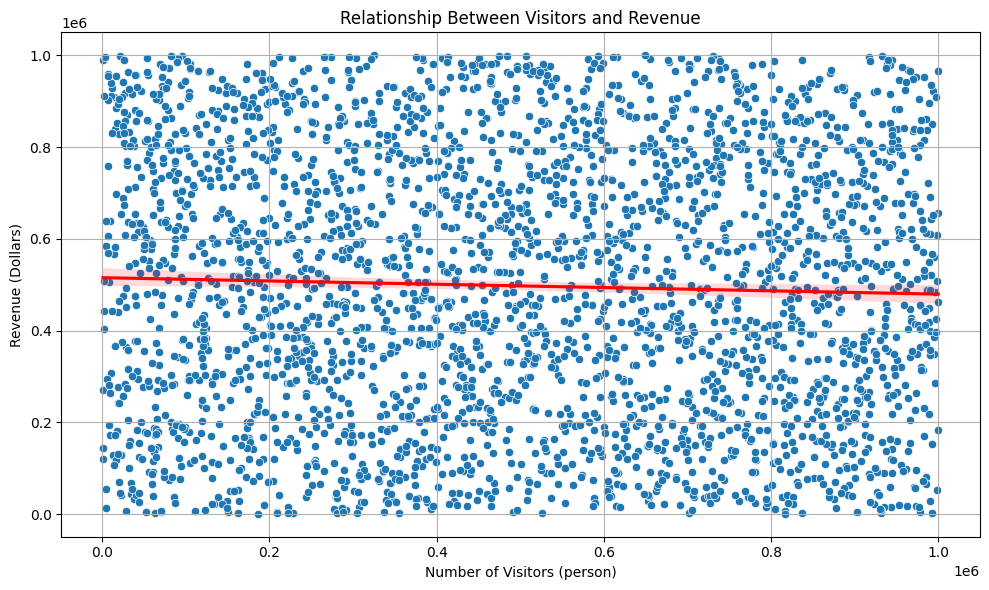

In [20]:
t = tour.sample(frac=0.5)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=t, x='Visitors', y='Revenue', marker='o')

sns.regplot(data=t, x='Visitors', y='Revenue', scatter=False, color='red')

plt.title('Relationship Between Visitors and Revenue')
plt.xlabel('Number of Visitors (person)')
plt.ylabel('Revenue (Dollars)')
plt.grid()
plt.tight_layout()
plt.show()



---


**หาค่าสหสัมพันธ์ของรายได้และระดับความพึงพอใจของแต่ละสถานที่ เพื่อเช็คว่าค่าทั้ง 2 มีความสัมพันธ์กันหรือไม่ และในที่นี้แทบไม่มีหรือไม่มีความสัมพันธ์กัน**

In [9]:
tour[['Revenue', 'Rating']].corr()

,Revenue,Rating
Revenue,1.000000,0.000574
Rating,0.000574,1.000000




---


**ทดสอบความเป็นอิสระระหว่างประเทศและประเภท โดยการทดสอบแบบ Chi-square test เพื่อหาว่าความสัมพันธฺระหว่างประเทศและประเภท**

In [10]:
stats.chi2_contingency(pd.crosstab(tour['Country'], tour['Category']))

Chi2ContingencyResult(statistic=26.552548090444382, pvalue=0.6466555784977197, dof=30, expected_freq=array([[143.71514443, 138.31023543, 138.31023543, 137.75588579,
        132.4895642 , 139.41893471],
       [145.4466522 , 139.97662381, 139.97662381, 139.41559526,
        134.08582401, 141.09868092],
       [139.5595258 , 134.31090332, 134.31090332, 133.77258307,
        128.65854066, 135.38754383],
       [157.9135081 , 151.97462014, 151.97462014, 151.36550342,
        145.57889464, 153.19285356],
       [148.39021539, 142.80948405, 142.80948405, 142.23710135,
        136.79946569, 143.95424946],
       [155.14309568, 149.30839873, 149.30839873, 148.70996828,
        143.02487894, 150.50525964],
       [146.83185841, 141.30973451, 141.30973451, 140.74336283,
        135.36283186, 142.44247788]]))



---


**แผนภูมิแสดงความถี่ของจำนวนสถานที่ท่องเที่ยวต่อจำนวนนักท่องเที่ยวในแต่ละช่วง**


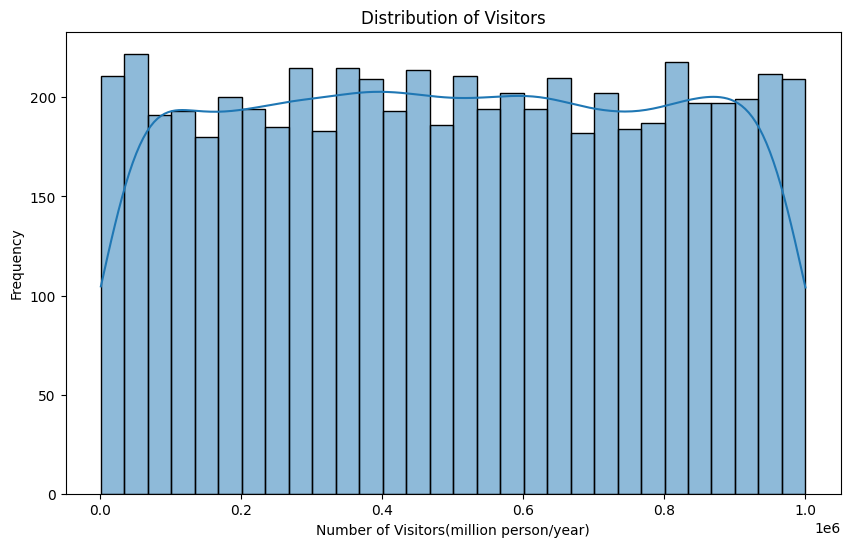

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(tour['Visitors'], bins=30, kde=True)
plt.title('Distribution of Visitors')
plt.xlabel('Number of Visitors(million person/year)')
plt.ylabel('Frequency')
plt.show()



---


**แผนภูมิแท่งแสดงจำนวนผู้เข้าชมตามในแต่ละประเภท**

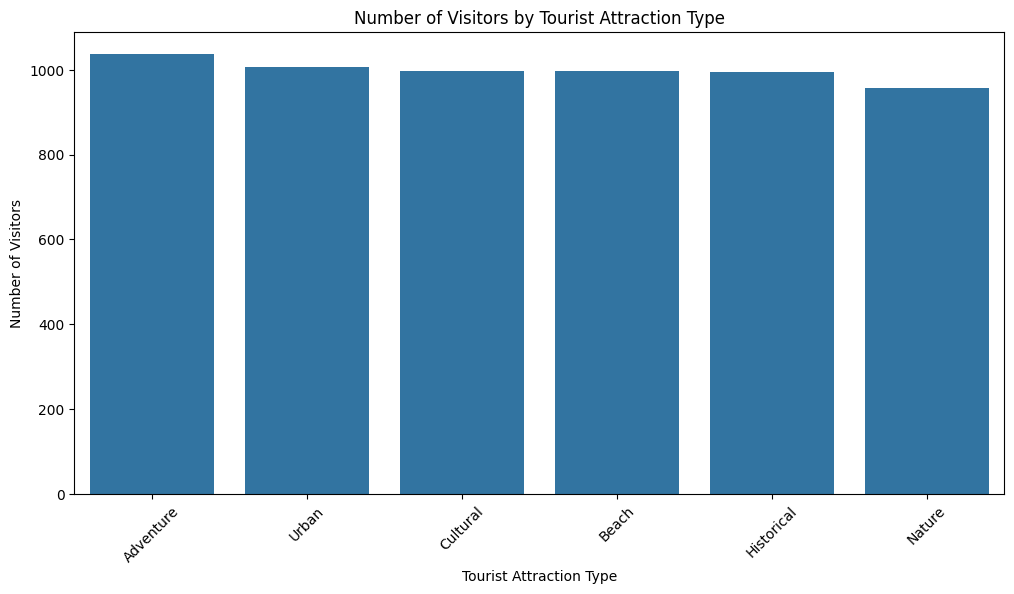

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=tour, x='Category', order=tour['Category'].value_counts().index)
plt.title('Number of Visitors by Tourist Attraction Type')
plt.xlabel('Tourist Attraction Type')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.show()



---


**แผนภูมิแสดงจำนวนผู้เข้าชมต่อประเภทและประเทศที่ไปเที่ยว เพื่อทำให้เห็นจำนวนผู้เข้าชมในประเภทและประเทศนั้นๆอย่างชัดเจน**

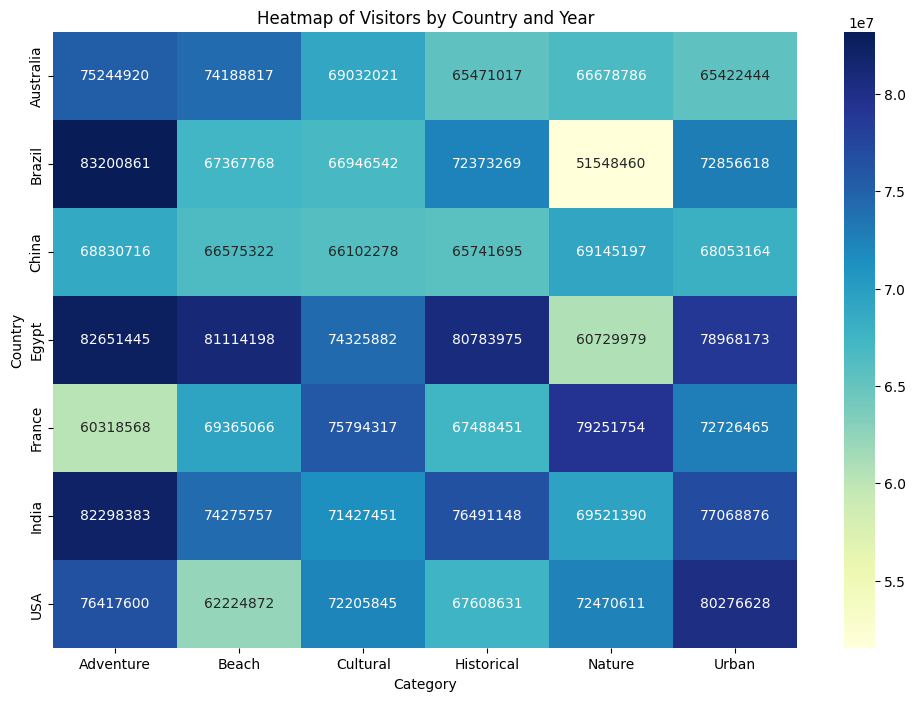

In [22]:
pivot_table = tour.pivot_table(values='Visitors', index='Country', columns='Category', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Visitors by Country and Year')
plt.xlabel('Category')
plt.ylabel('Country')
plt.show()



---


**แผนภูมิวงกลมที่แสดงสัดส่วนจำนวนสถานที่ท่องเที่ยวตามประเภทต่างๆ**

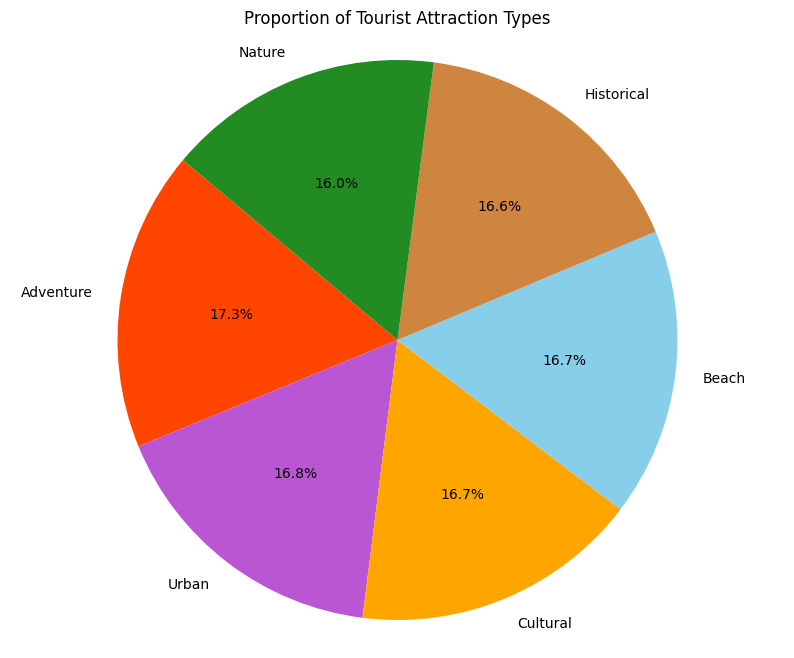

In [14]:
attraction_counts = tour['Category'].value_counts()

colors = ['#FF4500', '#BA55D3', '#FFA500', '#87CEEB', '#CD853F', '#228B22']

plt.figure(figsize=(10, 8))
plt.pie(attraction_counts, labels=attraction_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of Tourist Attraction Types')
plt.axis('equal')
plt.show()



---


**แผนที่โลกที่แสดงประเทศที่นักท่องเที่ยวไปเที่ยวและจำนวนนักท่องเที่ยว**

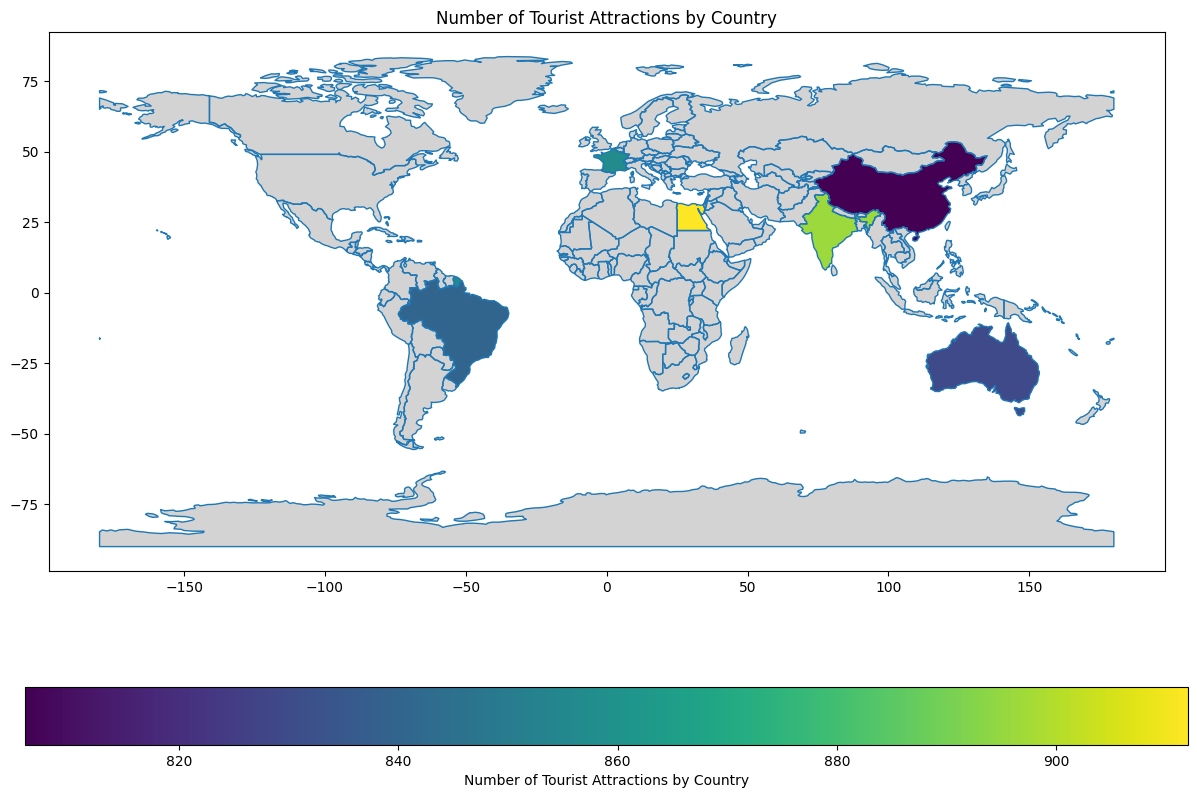

In [15]:
country_counts = tour['Country'].value_counts()

world = gpd.read_file('ne_110m_admin_0_countries.shp')

country_counts = country_counts.reset_index()
country_counts.columns = ['country', 'count']

merged = world.set_index('ADMIN').join(country_counts.set_index('country'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Tourist Attractions by Country",
                         'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey", "label": "Missing data"})
plt.title('Number of Tourist Attractions by Country')
plt.show()